In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# step function으로 activation function 만들기!

def step(value):
  if value >= 0:
    return 1
  else:
    return 0

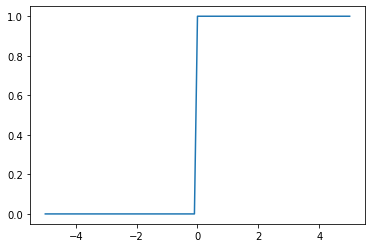

In [3]:
x = np.linspace(-5,5, 101)
y = [step(k) for k in x]

plt.plot(x,y)

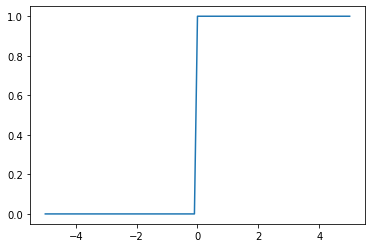

In [4]:
# y = [step(k) for k in x] 는 아래와 같은 코드이다.

y2 = []
for k in x:
  y2.append(step(k))

plt.plot(x,y2)

In [5]:
# perceptron 제작하기

def perceptron(x1, x2, w1, w2, b, activation_function):
  result = w1*x1 + w2*x2 + b
  return activation_function(result)

In [6]:
# AND gate

w1 = 0.7
w2 = 0.7
b = -1

for x1 in range(2):
  for x2 in range(2):
    print("x = ({}, {}), result = {}".format(x1, x2, perceptron(x1, x2, w1, w2, b, step)))

x = (0, 0), result = 0
x = (0, 1), result = 0
x = (1, 0), result = 0
x = (1, 1), result = 1


In [7]:
# OR gate

w1 = 1.2
w2 = 1.2
b = -1

for x1 in range(2):
  for x2 in range(2):
    print("x = ({}, {}), result = {}".format(x1, x2, perceptron(x1, x2, w1, w2, b, step)))

x = (0, 0), result = 0
x = (0, 1), result = 1
x = (1, 0), result = 1
x = (1, 1), result = 1


In [8]:
# NAND gate

w1 = -0.5
w2 = -0.5
b = 0.9

for x1 in range(2):
  for x2 in range(2):
    print("x = ({}, {}), result = {}".format(x1, x2, perceptron(x1, x2, w1, w2, b, step)))

x = (0, 0), result = 1
x = (0, 1), result = 1
x = (1, 0), result = 1
x = (1, 1), result = 0


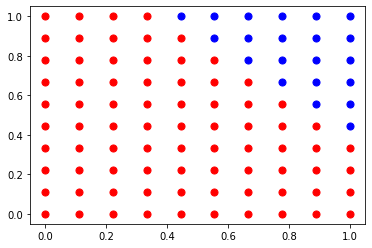

In [9]:
# 시각화를 한번 해보자!

# w1 = -0.8
# w2 = -0.8
# b = 0.9


w1 = 0.7
w2 = 0.7
b = -1

X1 = np.linspace(0, 1, 10)
X2 = np.linspace(0, 1, 10)

for x1 in X1:
  for x2 in X2:
    result = perceptron(x1, x2, w1, w2, b, step)

    if result == 0:
      color = 'red'
    else:
      color = 'blue'
    
    plt.scatter(x1, x2, color = color, s = 50)


In [10]:
# XOR gate

w1 = -0.5
w2 = -0.5
b = 0.9

for x1 in range(2):
  for x2 in range(2):
    print("x = ({}, {}), result = {}".format(x1, x2, perceptron(x1, x2, w1, w2, b, step)))


# Single layer로는 절대 할 수 없다!!

x = (0, 0), result = 1
x = (0, 1), result = 1
x = (1, 0), result = 1
x = (1, 1), result = 0


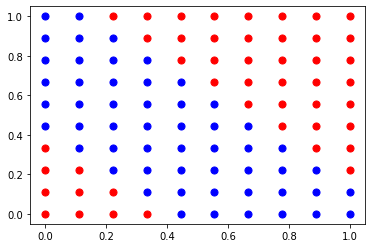

In [11]:
# Multi layer perceptron

X1 = np.linspace(0, 1, 10)
X2 = np.linspace(0, 1, 10)

w1_11, w1_12, w1_21, w1_22 = 1, 1, 1, 1
b1_1, b1_2 = -0.4, -1.2

w2_1, w2_2 = 0.5, -0.2
b2_1 = -0.4

for x1 in X1:
  for x2 in X2:
    y1 = perceptron(x1, x2, w1_11, w1_21, b1_1, step)
    y2 = perceptron(x1, x2, w1_12, w1_22, b1_2, step)

    result = perceptron(y1, y2, w2_1, w2_2, b2_1, step)

    if result == 0:
      color = 'red'
    else: 
      color = 'blue'

    plt.scatter(x1, x2, color = color, s = 50)

    # print("x = ({}, {}), result = {}".format(x1, x2, result))



In [12]:
# Mnist 데이터 실습
# 파이썬에서 deep learning은 tensorflow 패키지 이용

import tensorflow as tf
from tensorflow.keras.datasets import mnist



In [13]:
# 1. 데이터 준비

(X_train, y_train), (X_test, y_test) = mnist.load_data()
train_size, train_nrow, train_ncol = X_train.shape
test_size, test_nrow, test_ncol = X_test.shape

print("Shape of X_train : {}".format(X_train.shape))
print("Shape of y_train : {}".format(y_train.shape))
print("Shape of X_test  : {}".format(X_test.shape))
print("Shape of y_test  : {}".format(y_test.shape))
print("Row size of each image  : {}".format(train_nrow))
print("Col size of each image  : {}".format(train_ncol))

11490434/11490434 [==============================] - 2s 0us/step
Shape of X_train : (60000, 28, 28)
Shape of y_train : (60000,)
Shape of X_test  : (10000, 28, 28)
Shape of y_test  : (10000,)
Row size of each image  : 28
Col size of each image  : 28


In [14]:
def print_array_of(img_array): 
  for img_row in img_array:
    for pixel in img_row:
      print("{:4d}".format(pixel), end = "")
    print("")

In [15]:
loc = int(np.random.randint(0,train_size,1))

print_array_of(X_train[loc])

print("-"*120)
print("This is :", y_train[loc])

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  64 128  64   0   0   0   0   0   0   0   0   0 128 191  64   0   0   0   0   0   0   0
   0   0   0   0   0 128 255 255 255 191 128   0 128 128 128 128 128 191 255 255 128   0   0   0   0   0   0   0
   0   0   0   0   0 128 255 255 255 255 255 255 255 255 255 255 255 255 255 255 128   0   0   0

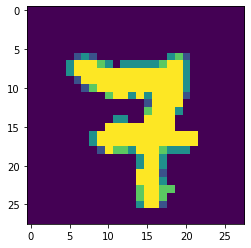

In [16]:
plt.imshow(X_train[loc])
plt.show()

In [17]:
# data 모양 바꾸기, 정규화
# Reshape(Flatten) and Normalization

X_train = X_train.reshape(train_size, train_nrow * train_ncol) / 255.0
X_test  = X_test.reshape(test_size, test_nrow * test_ncol) / 255.0

print(X_train.shape)

(60000, 784)


In [18]:
# 모델 구축

# Sequential model (perceptron 만들기)
model = tf.keras.models.Sequential()

# Stacking layers
model.add(tf.keras.layers.Dense(units = 128,
                                activation = 'relu',
                                input_shape = (train_nrow * train_ncol,)))  # hidden layer
model.add(tf.keras.layers.Dense(units = 10,
                                activation = 'softmax'))  # ouput layer

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 3. 모델 컴파일 (학습을 어떤방법으로 할 것인지 정하기)

model.compile(optimizer = 'sgd', # 최솟값으로 하산하는 방법
              loss = 'sparse_categorical_crossentropy', # 손실함수 정하기
              metrics = ['accuracy'])  # 평가지표

In [22]:
# 4. 모델 학습
# 초기 weight는 랜덤이다.

model.fit(X_train, y_train,  # 지도학습이다!
          epochs = 20,  # 몇 번 학습할래?
          verbose = 1,  # 학습되는 출력창 조절
          validation_split = 0.2) 

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2298 - accuracy: 0.9358 - val_loss: 0.2202 - val_accuracy: 0.9394
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2152 - accuracy: 0.9396 - val_loss: 0.2072 - val_accuracy: 0.9434
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2024 - accuracy: 0.9436 - val_loss: 0.1990 - val_accuracy: 0.9462
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1913 - accuracy: 0.9464 - val_loss: 0.1895 - val_accuracy: 0.9477
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1815 - accuracy: 0.9489 - val_loss: 0.1812 - val_accuracy: 0.9502
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1723 - accuracy: 0.9511 - val_loss: 0.1745 - val_accuracy: 0.9518
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1643 - accuracy: 0.9542 - val_loss: 0.1694 - val_accuracy:

In [71]:
# 5. 모델 평가.

model.evaluate(X_test, y_test)

# Test set에 대해서
# cross entropy 손실 값은 0.1052 이다.
# 정확도(accuracy)는 97.01% 이다.

313/313 [==============================] - 1s 3ms/step - loss: 0.1052 - accuracy: 0.9701


[0.10524709522724152, 0.9700999855995178]

79/79 [==============================] - 0s 2ms/step
모델이 예측한 정답 : 1
실제 정답 :  2


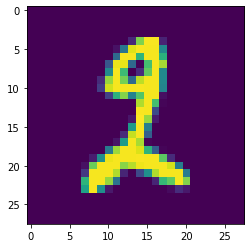

In [79]:
# 모델 예측

pred = model.predict(X_test, batch_size = 128)  #X_test 를 input하여 나온 y_pred

loc = int(np.random.randint(0, len(pred), 1))

print("모델이 예측한 정답 :", np.argmax(pred[loc]))
print("실제 정답 : ", y_test[loc])

plt.imshow(X_test[loc].reshape(test_nrow, test_ncol))
plt.show()

In [80]:
# confusion matrix 만들기

y_pred = np.array([np.argmax(pred[loc]) for loc in range(len(X_test))])
y_pred  # Image 데이터에 따른 모델이 예측한 정답

array([7, 2, 1, ..., 4, 5, 6])

In [81]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [83]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred)
print(cf)

[[ 966    0    1    2    1    2    4    2    1    1]
 [   0 1123    2    1    0    1    4    0    4    0]
 [   5    1  999    6    3    0    3    8    6    1]
 [   0    0    4  990    0    2    0    6    6    2]
 [   1    0    6    1  953    0    2    3    2   14]
 [   5    1    1   10    1  856    8    1    6    3]
 [   6    3    0    1    7    8  932    0    1    0]
 [   0    6   10    5    0    1    0  996    1    9]
 [   6    0    3   10    3    6    8    6  929    3]
 [   6    6    1   12   15    3    1    6    2  957]]


In [84]:
# accuracy 구하기

accuracy = np.diag(cf).sum() / len(y_test)
print(accuracy)

0.9701


In [85]:
import itertools

def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title='Mnist Confusion matrix'):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig = plt.figure(figsize=(10,8)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 15)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, fontsize = 15)
        plt.yticks(tick_marks, target_names, fontsize = 15)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black", fontsize = 15)
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black", fontsize = 10)

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 15)
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize = 10)
    # plt.savefig("Mnist confusion matrix.png")
    plt.show()


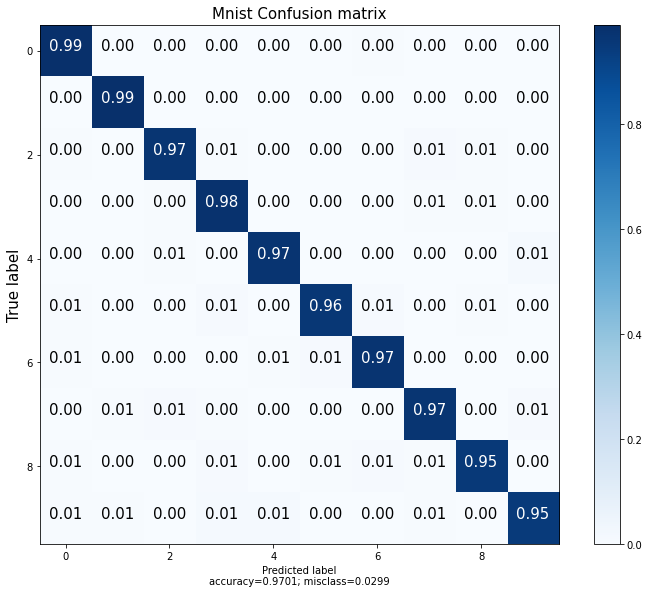

In [86]:
CM = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(CM)